In [33]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [35]:
uploaded = files.upload()

Saving train.csv to train.csv


In [36]:

uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pa

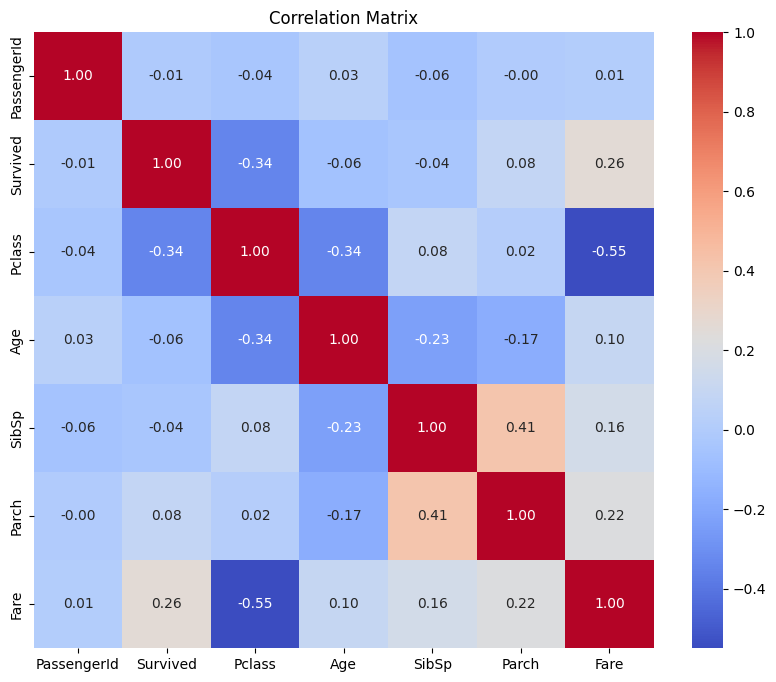

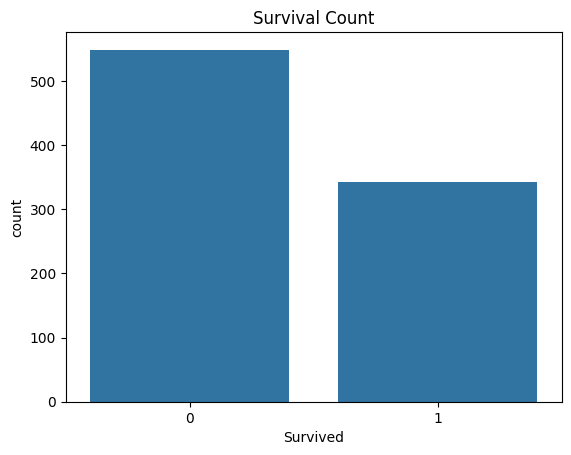

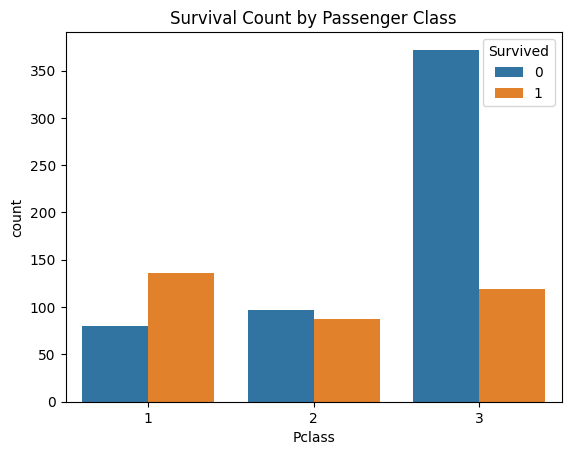

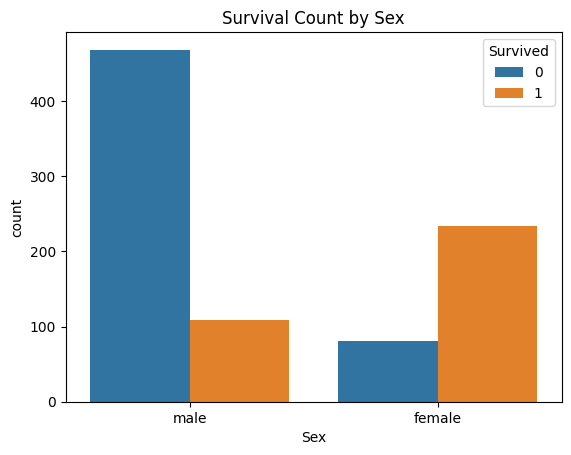

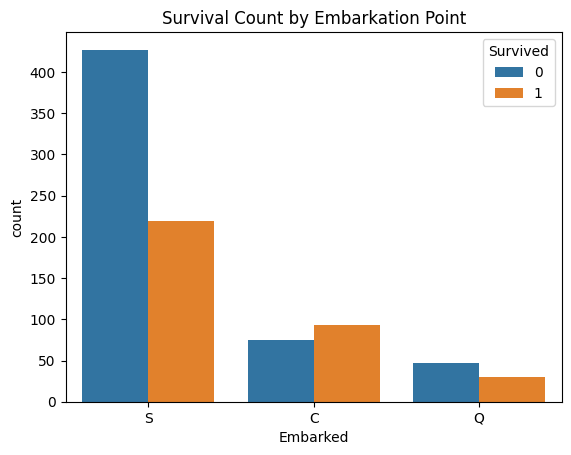

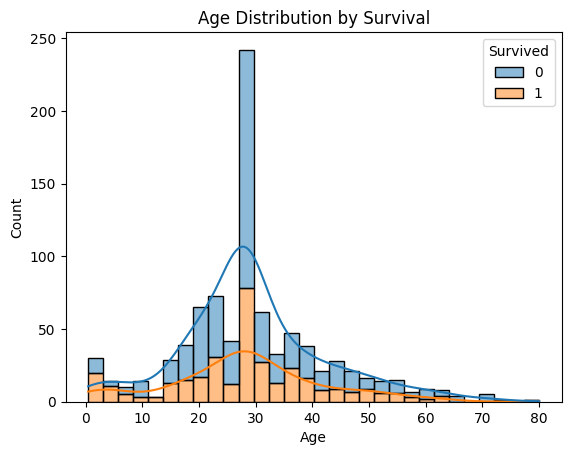

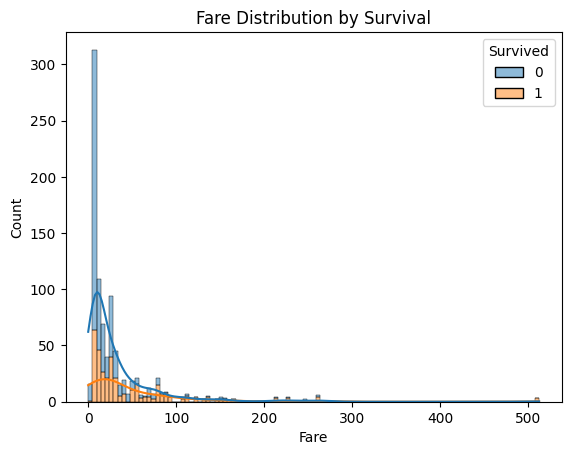

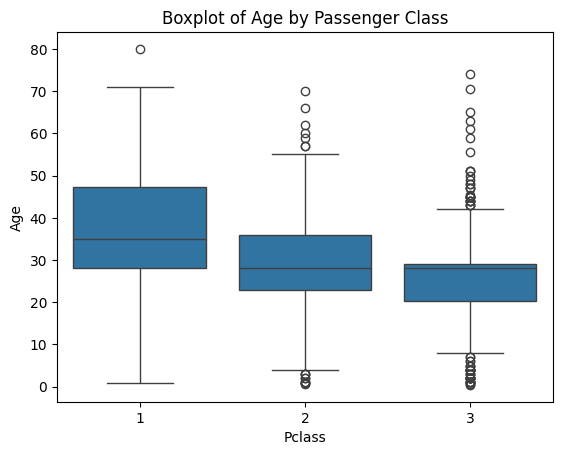

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

# Inspect the datasets
print("Training Dataset Info:")
print(train_df.info())
print("\nTest Dataset Info:")
print(test_df.info())

# Data Cleaning
# Handling missing values
print("\nMissing values in the training dataset:")
print(train_df.isnull().sum())
print("\nMissing values in the test dataset:")
print(test_df.isnull().sum())

# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)

# Verify that there are no missing values left
print("\nMissing values in the training dataset after filling:")
print(train_df.isnull().sum())
print("\nMissing values in the test dataset after filling:")
print(test_df.isnull().sum())

# Exploratory Data Analysis (EDA)
# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)

# Verify that there are no missing values left
print("\nMissing values in the training dataset after filling:")
print(train_df.isnull().sum())
print("\nMissing values in the test dataset after filling:")
print(test_df.isnull().sum())

# Exploratory Data Analysis (EDA)
# Select numeric columns for correlation matrix
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
corr_matrix = train_df[numeric_cols].corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

# Distribution of 'Survived' based on 'Pclass'
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Passenger Class')
plt.show()

# Distribution of 'Survived' based on 'Sex'
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')
plt.show()

# Distribution of 'Survived' based on 'Embarked'
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival Count by Embarkation Point')
plt.show()

# Age distribution for 'Survived' and 'Not Survived'
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

# Fare distribution for 'Survived' and 'Not Survived'
sns.histplot(data=train_df, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Fare Distribution by Survival')
plt.show()

# Boxplot of Age and Pclass
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title('Boxplot of Age by Passenger Class')
plt.show()
